## Project 3: Markovian reservoir engineering

In Chapter 5, we introduced an example in which the interaction of a two-qubit system with its environment results in a maximally entangled state between the system qubits. In this project, we will verify them experimentally.

The overall goal is to use the given circuits (appended again below) to drive the state of the system from maximally mixed to $|\psi^-\rangle$. In this project, we will not use the tomographic reconstruction of the two-qubit state; instead, we will measure the populations of the four Bell states by changing basis.

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

<ipython-input-2-5967a9e13278>:28: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  zz.cu3(theta, 0.0, 0.0, q[a_zz], q[system[1]])


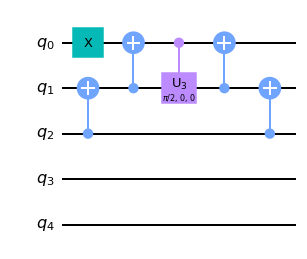

In [2]:
#######################
#  ZZ pump on IBMQX2  #
#######################

# Quantum register
q = QuantumRegister(5, name='q')

# Quantum circuit  
zz = QuantumCircuit(q)

# ZZ pump acting on system qubits
## Qubit identification
system = [2, 1]
a_zz = 0

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
### Map information to ancilla
zz.cx(q[system[0]], q[system[1]])
zz.x(q[a_zz])
zz.cx(q[system[1]], q[a_zz])
    
### Conditional rotation
zz.cu3(theta, 0.0, 0.0, q[a_zz], q[system[1]])
    
### Inverse mapping
zz.cx(q[system[1]], q[a_zz])
zz.cx(q[system[0]], q[system[1]])

# Draw circuit
zz.draw(output='mpl')

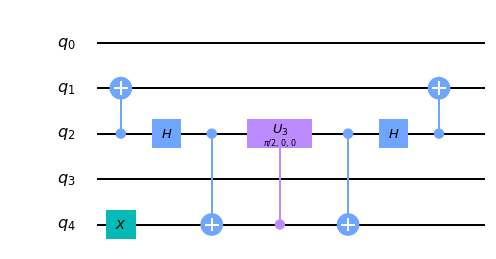

In [3]:
#######################
#  XX pump on IBMQX2  #
#######################

# Quantum register
q = QuantumRegister(5, name='q')

# Quantum circuit  
xx = QuantumCircuit(q)

# XX pump acting on system qubits
## Qubit identification
system = [2, 1]
a_xx = 4

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
### Map information to ancilla
xx.cx(q[system[0]], q[system[1]])
xx.h(q[system[0]])
xx.x(q[a_xx])
xx.cx(q[system[0]], q[a_xx])
    
### Conditional rotation
xx.cu3(theta, 0.0, 0.0, q[a_xx], q[system[0]])
    
### Inverse mapping
xx.cx(q[system[0]], q[a_xx])
xx.h(q[system[0]])
xx.cx(q[system[0]], q[system[1]])

# Draw circuit
xx.draw(output='mpl')

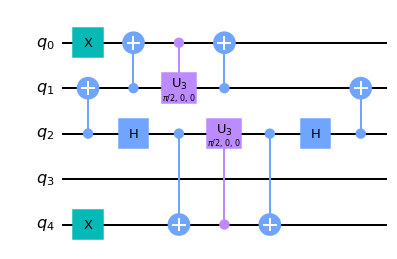

In [3]:
###########################
#  ZZ-XX pumps on IBMQX2  #
###########################

# Quantum register
q = QuantumRegister(5, name='q')

# Quantum circuit  
zz_xx = QuantumCircuit(q)

# ZZ and XX pumps acting on system qubits
## Qubit identification
system = [2, 1]
a_zz = 0
a_xx = 4

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
## ZZ pump
### Map information to ancilla
zz_xx.cx(q[system[0]], q[system[1]])
zz_xx.x(q[a_zz])
zz_xx.cx(q[system[1]], q[a_zz])
    
### Conditional rotation
zz_xx.cu3(theta, 0.0, 0.0, q[a_zz], q[system[1]])
    
### Inverse mapping
zz_xx.cx(q[system[1]], q[a_zz])
#zz_xx.cx(q[system[0]], q[system[1]])

## XX pump
### Map information to ancilla
#zz_xx.cx(q[system[0]], q[system[1]])
zz_xx.h(q[system[0]])
zz_xx.x(q[a_xx])
zz_xx.cx(q[system[0]], q[a_xx])
    
### Conditional rotation
zz_xx.cu3(theta, 0.0, 0.0, q[a_xx], q[system[0]])
    
### Inverse mapping
zz_xx.cx(q[system[0]], q[a_xx])
zz_xx.h(q[system[0]])
zz_xx.cx(q[system[0]], q[system[1]])

# Draw circuit
zz_xx.draw(output='mpl')

### Task 1
Write three functions, one for each channel (ZZ, XX, and their composition), returning a quantum circuit implementing the channel on the system qubits for a given value of the efficiency parameter $p$ (in the composition map, impose equal efficiencies for both). The circuits must include the **measurement of the system qubits in the Bell basis**. Tip: remove consecutive CNOT gates (and single-qubit ones) resulting in identity.

Find the suggested structure for the functions below.

In [4]:
def zz_pump(q, c, p, system, ancilla):
    """Returns a QuantumCircuit implementing the ZZ pump channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for the channel, between 0 and 1
        system (list): list of indices for the system qubits
        ancilla (int): index for the ancillary qubit
    
    Returns:
        A QuantumCircuit object
    """

In [5]:
def xx_pump(q, c, p, system, ancilla):
    """Returns a QuantumCircuit implementing the XX pump channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for the channel, between 0 and 1
        system (list): list of indices for the system qubits
        ancilla (int): index for the ancillary qubit
    
    Returns:
        A QuantumCircuit object
    """

In [6]:
def zz_xx_pump(q, c, p, system, ancillae):
    """Returns a QuantumCircuit implementing the composition channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for both channels, between 0 and 1
        system (list): list of indices for the system qubits
        ancillae (list): list of indices for the ancillary qubits
    
    Returns:
        A QuantumCircuit object
    """

### Task 2

We need to set the two-qubit system initially in the maximally mixed state $\rho = I_4/4$, where $I_4$ is the $4\times4$ identity matrix. In principle, this could be done by entangling the system with other ancillary qubits, but that would require two extra qubits in our simulation. Instead, we can create a *proper statistical mixture*. This means that we can obtain $\rho$ by mixing four initially pure states, e.g. the two-qubit computational basis states.

For each initial state of the qubits $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$, apply the three channels for different values of $p \in [0,1]$ and save the resulting Bell populations for the next task.

### Task 3

To finally simulate the effect of the different channels on the maximally mixed state, average all the results over the four initial states. Plot the results as a function of the channel efficiency $p$.

### Homework

Run the circuits on the IBM Q Experience with noise mitigation and plot the results.